In [1]:
import binascii, os, glob, sys, time, datetime
import pandas as pd
import UDP
import os
import datetime
import re
import matplotlib.pyplot as plt
import ast
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties as font
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei') # 在圖表上顯示中文
import matplotlib.ticker as mtick
from collections import Counter
from datetime import datetime, timedelta

In [2]:
opt0407 = pd.read_csv(r'D:/委託與成交明細/成交/opt/處理後_夜盤_1140407.csv')

針對月選：TXO19000P5、TXO19000D5

In [3]:
call = opt0407[opt0407['商品名稱'] == 'TXO19000D5']
put = opt0407[opt0407['商品名稱'] == 'TXO19000P5']

call0407 = call.copy()
put0407 = put.copy()

# 使用正則表達式提取履約價格
put0407['履約價格'] = put0407['商品名稱'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
call0407['履約價格'] = call0407['商品名稱'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

call0407 = call0407.copy()
put0407 = put0407.copy()

# 先將 object 轉成 list
call0407["成交價格"] = call0407["成交價格"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
call0407["成交數量"] = call0407["成交數量"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

put0407["成交價格"] = put0407["成交價格"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
put0407["成交數量"] = put0407["成交數量"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 取最後一筆成交價格與數量
call0407["call成交價格"] = call0407["成交價格"].apply(lambda x: x[-1] if isinstance(x, list) and x else x)
call0407["call成交價格"] = call0407["call成交價格"] /1000
call0407["call成交數量"] = call0407["成交數量"].apply(lambda x: x[-1] if isinstance(x, list) and x else x)

put0407["put成交價格"] = put0407["成交價格"].apply(lambda x: x[-1] if isinstance(x, list) and x else x)
put0407["put成交價格"] = put0407["put成交價格"] /1000
put0407["put成交數量"] = put0407["成交數量"].apply(lambda x: x[-1] if isinstance(x, list) and x else x)

call0407_month = call0407.drop(columns=["流水序號", "成交價量(判斷有無穿價)", "成交價格","成交數量"])
put0407_month = put0407.drop(columns=["流水序號", "成交價量(判斷有無穿價)", "成交價格","成交數量"])

針對週選：TX219000P5、TX219000D5

In [4]:
call_1 = opt0407[opt0407['商品名稱'] == 'TX219000D5']
put_1 = opt0407[opt0407['商品名稱'] == 'TX219000P5']

call0407_1 = call_1.copy()
put0407_1 = put_1.copy()

# 使用正則表達式提取履約價格
put0407_1['履約價格'] = put0407_1['商品名稱'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
call0407_1['履約價格'] = call0407_1['商品名稱'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

call0407_1 = call0407_1.copy()
put0407_1 = put0407_1.copy()

# 先將 object 轉成 list
call0407_1["成交價格"] = call0407_1["成交價格"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
call0407_1["成交數量"] = call0407_1["成交數量"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

put0407_1["成交價格"] = put0407_1["成交價格"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
put0407_1["成交數量"] = put0407_1["成交數量"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 取最後一筆成交價格與數量
call0407_1["call成交價格"] = call0407_1["成交價格"].apply(lambda x: x[-1] if isinstance(x, list) and x else x)
call0407_1["call成交價格"] = call0407_1["call成交價格"] /1000
call0407_1["call成交數量"] = call0407_1["成交數量"].apply(lambda x: x[-1] if isinstance(x, list) and x else x)

put0407_1["put成交價格"] = put0407_1["成交價格"].apply(lambda x: x[-1] if isinstance(x, list) and x else x)
put0407_1["put成交價格"] = put0407_1["put成交價格"] /1000
put0407_1["put成交數量"] = put0407_1["成交數量"].apply(lambda x: x[-1] if isinstance(x, list) and x else x)

call0407_week = call0407_1.drop(columns=["流水序號", "成交價量(判斷有無穿價)", "成交價格","成交數量"])
put0407_week = put0407_1.drop(columns=["流水序號", "成交價量(判斷有無穿價)", "成交價格","成交數量"])

In [5]:
call_df = call0407_month.copy()
put_df = put0407_month.copy()

# 轉換 `成交時間` 為標準時間格式
call_df["時_分_秒"] = call_df["成交時間"].astype(str).str.zfill(9).apply(lambda x: f"{x[:2]}:{x[2:4]}:{x[4:6]}.{x[6:]}")
put_df["時_分_秒"] = put_df["成交時間"].astype(str).str.zfill(9).apply(lambda x: f"{x[:2]}:{x[2:4]}:{x[4:6]}.{x[6:]}")

# 合併 `成交日期` 和 `時_分_秒`，轉換為 datetime
call_df["完整時間"] = pd.to_datetime(call_df["成交日期"].astype(str) + " " + call_df["時_分_秒"])
put_df["完整時間"] = pd.to_datetime(put_df["成交日期"].astype(str) + " " + put_df["時_分_秒"])

# 確保數據排序
call_df = call_df.sort_values("完整時間")
put_df = put_df.sort_values("完整時間")

# === 合併 Call + Put ===
df = pd.merge_asof(
    call_df.sort_values("完整時間"),  # 確保時間排序
    put_df.sort_values("完整時間"),
    on="完整時間",
    direction="nearest",
    tolerance=pd.Timedelta(milliseconds=00)  # 設定時間誤差容忍範圍
)

df_filtered = df.dropna(subset=["call成交價格", "put成交價格"])

# === 計算合成價格 ===
df_filtered["合成價格"] = df_filtered["call成交價格"] - df_filtered["put成交價格"] + 19000

C:\Users\ptdintern1.fut\AppData\Local\Temp\ipykernel_12588\1514759504.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["合成價格"] = df_filtered["call成交價格"] - df_filtered["put成交價格"] + 19000


In [6]:
call_df_1 = call0407_week.copy()
put_df_1 = put0407_week.copy()

# 轉換 `成交時間` 為標準時間格式
call_df_1["時_分_秒"] = call_df_1["成交時間"].astype(str).str.zfill(9).apply(lambda x: f"{x[:2]}:{x[2:4]}:{x[4:6]}.{x[6:]}")
put_df_1["時_分_秒"] = put_df_1["成交時間"].astype(str).str.zfill(9).apply(lambda x: f"{x[:2]}:{x[2:4]}:{x[4:6]}.{x[6:]}")

# 合併 `成交日期` 和 `時_分_秒`，轉換為 datetime
call_df_1["完整時間"] = pd.to_datetime(call_df_1["成交日期"].astype(str) + " " + call_df_1["時_分_秒"])
put_df_1["完整時間"] = pd.to_datetime(put_df_1["成交日期"].astype(str) + " " + put_df_1["時_分_秒"])

# 確保數據排序
call_df_1 = call_df_1.sort_values("完整時間")
put_df_1 = put_df_1.sort_values("完整時間")

# === 合併 Call + Put ===
df_1 = pd.merge_asof(
    call_df_1.sort_values("完整時間"),  # 確保時間排序
    put_df_1.sort_values("完整時間"),
    on="完整時間",
    direction="nearest",
    tolerance=pd.Timedelta(milliseconds=200)  # 設定時間誤差容忍範圍
)

df_filtered_1 = df_1.dropna(subset=["call成交價格", "put成交價格"])

# === 計算合成價格 ===
df_filtered_1["合成價格"] = df_filtered_1["call成交價格"] - df_filtered_1["put成交價格"] + 19000

C:\Users\ptdintern1.fut\AppData\Local\Temp\ipykernel_12588\2557222694.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_1["合成價格"] = df_filtered_1["call成交價格"] - df_filtered_1["put成交價格"] + 19000


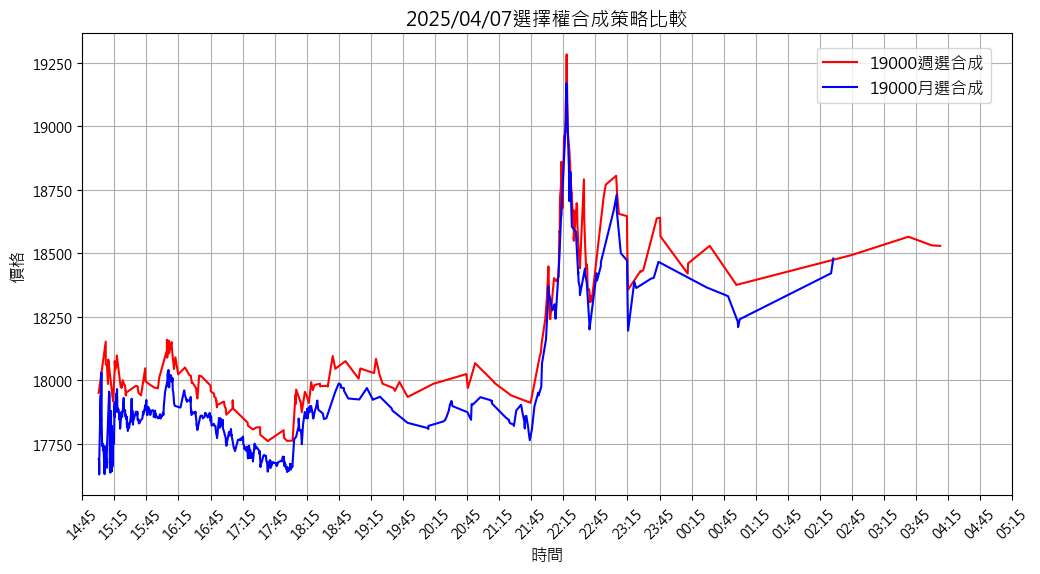

In [7]:
import matplotlib.dates as mdates

# === 建立圖表 ===
fig, ax1 = plt.subplots(figsize=(12, 6))  # 設定圖表大小

# 左軸：期貨價格 vs 合成價格
ax1.plot(df_filtered_1["完整時間"], df_filtered_1["合成價格"], label="19000週選合成", color="red", markersize=4)
ax1.plot(df_filtered["完整時間"], df_filtered["合成價格"], label="19000月選合成", color="blue", markersize=4)

# 設定 Y 軸標籤
ax1.set_ylabel("價格", fontsize=12)
ax1.set_xlabel("時間", fontsize=12)
ax1.grid(True)

# 設定 X 軸刻度（只標示 4/7 夜盤的特定時間）
xticks_labels = pd.to_datetime([
    "2025-04-07 15:00", "2025-04-07 17:00", "2025-04-07 19:00",
    "2025-04-07 21:00", "2025-04-07 23:00", "2025-04-08 01:00",
    "2025-04-08 03:00", "2025-04-08 05:00"
])
ax1.set_xticks(xticks_labels)

# 設定 X 軸刻度，每 30 分鐘顯示一次
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 顯示 "時:分"
plt.xticks(rotation=45)  # 旋轉 X 軸標籤，避免重疊

# 設定 X 軸範圍，讓 15:00 是主要起點，但保留一點左側空間
start_time = pd.to_datetime("2025-04-07 14:45")  # 稍微提前 15 分鐘
end_time = pd.to_datetime("2025-04-08 5:15")  # 原設定結束時間
ax1.set_xlim([start_time, end_time])

# 調整圖例位置，使其更靠右
fig.legend(loc="upper left", bbox_to_anchor=(0.73, 0.87), fontsize=12)  # 調整 X 軸位置

# 設定標題
plt.title("2025/04/07選擇權合成策略比較", fontsize=14)

# 顯示圖表
plt.show()


In [ ]:
# 設定 X 軸刻度（只標示 4/7 夜盤的特定時間）
xticks_labels = pd.to_datetime([
    "2025-04-07 15:00", "2025-04-07 15:10", "2025-04-07 15:20", "2025-04-07 15:30", "2025-04-07 15:40",
    "2025-04-07 15:50", "2025-04-07 16:00", "2025-04-08 16:10", "2025-04-07 16:20", "2025-04-07 16:30",
    "2025-04-08 16:40", "2025-04-08 16:50", "2025-04-08 17:00"
])
ax1.set_xticks(xticks_labels)

針對1點多~5點，市場沒甚麼交易量，圖形看起來很醜，甚至沒辦法畫 (因為原本預測call, put 只能差200毫秒以內，但是凌晨的那段時間差距可能都是以數分鐘、數十分鐘再算的)

有需要將手續費、權利金等內容加入其中嗎，因為以期貨價格-選擇權合成價格會發現怪怪的，好像很少到0，基本上都會比0差一點點 (25點內)

補充一些圖形中的數據說明

平均價差、最大價差

In [10]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 0 to 2342
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   成交日期_x    1019 non-null   int64         
 1   成交時間_x    1019 non-null   int64         
 2   商品名稱_x    1019 non-null   object        
 3   履約價格_x    1019 non-null   int64         
 4   call成交價格  1019 non-null   float64       
 5   call成交數量  1019 non-null   int64         
 6   時_分_秒_x   1019 non-null   object        
 7   完整時間      1019 non-null   datetime64[ns]
 8   成交日期_y    1019 non-null   float64       
 9   成交時間_y    1019 non-null   float64       
 10  商品名稱_y    1019 non-null   object        
 11  履約價格_y    1019 non-null   float64       
 12  put成交價格   1019 non-null   float64       
 13  put成交數量   1019 non-null   float64       
 14  時_分_秒_y   1019 non-null   object        
 15  合成價格      1019 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(4), object(4)
memory usag

In [11]:
df_filtered_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 2 to 3804
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   成交日期_x    355 non-null    int64         
 1   成交時間_x    355 non-null    int64         
 2   商品名稱_x    355 non-null    object        
 3   履約價格_x    355 non-null    int64         
 4   call成交價格  355 non-null    float64       
 5   call成交數量  355 non-null    int64         
 6   時_分_秒_x   355 non-null    object        
 7   完整時間      355 non-null    datetime64[ns]
 8   成交日期_y    355 non-null    float64       
 9   成交時間_y    355 non-null    float64       
 10  商品名稱_y    355 non-null    object        
 11  履約價格_y    355 non-null    float64       
 12  put成交價格   355 non-null    float64       
 13  put成交數量   355 non-null    float64       
 14  時_分_秒_y   355 non-null    object        
 15  合成價格      355 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(4), object(4)
memory usage

設定將月選成交時間與週選成交時間去對齊，允許1分鐘的誤差

In [8]:
import pandas as pd

# 確保資料按時間排序
df_filtered = df_filtered.sort_values("完整時間")
df_filtered_1 = df_filtered_1.sort_values("完整時間")

# 進行「最近匹配」合併
merged_df = pd.merge_asof(df_filtered, df_filtered_1, on="完整時間", direction="nearest", suffixes=("_month", "_week"),tolerance=pd.Timedelta(milliseconds=1000))

# 計算價差
merged_df["價差"] = merged_df["合成價格_month"] - merged_df["合成價格_week"]

# 計算平均價差
avg_price_diff = merged_df["價差"].mean()

# 計算最小價差
max_price_diff = merged_df["價差"].max()

# 計算最大價差
min_price_diff = merged_df["價差"].min()

print(f"平均價差: {avg_price_diff:.2f}")
print(f"最小價差: {max_price_diff:.2f}")
print(f"最大價差: {min_price_diff:.2f}")


平均價差: -122.16
最小價差: -92.00
最大價差: -260.00


In [14]:
# 確保資料按時間排序
merged_df = merged_df.sort_values("完整時間")

# 排除 15:00 ~ 16:00 的數據
filtered_df = merged_df[
    (merged_df["完整時間"] < pd.to_datetime("2025-04-07 15:00")) |
    (merged_df["完整時間"] > pd.to_datetime("2025-04-07 23:00"))
]

# 挑選價差最大的 3 個時間點，並包含週選合約價格與月選合成價格
top_3 = filtered_df.nsmallest(3, "價差")[["完整時間", "價差", "合成價格_week", "合成價格_month"]]
print(top_3)

                       完整時間    價差  合成價格_week  合成價格_month
994 2025-04-07 23:14:41.328 -96.0    18567.0     18471.0
984 2025-04-07 23:02:06.832   NaN        NaN     18668.0
985 2025-04-07 23:04:55.602   NaN        NaN     18730.0


In [69]:
# 找到最大價差的索引
max_diff_idx = merged_df["價差"].idxmin()

# 提取對應的資料
max_diff_row = merged_df.loc[max_diff_idx]

print(max_diff_row)

成交日期_x_month                        20250407
成交時間_x_month                       150022588
商品名稱_x_month                      TXO19000D5
履約價格_x_month                           19000
call成交價格_month                         189.0
call成交數量_month                             1
時_分_秒_x_month                   15:00:22.588
完整時間              2025-04-07 15:00:22.588000
成交日期_y_month                      20250407.0
成交時間_y_month                     150022588.0
商品名稱_y_month                      TXO19000P5
履約價格_y_month                         19000.0
put成交價格_month                         1500.0
put成交數量_month                            1.0
時_分_秒_y_month                   15:00:22.588
合成價格_month                           17689.0
成交日期_x_week                       20250407.0
成交時間_x_week                      150022255.0
商品名稱_x_week                       TX219000D5
履約價格_x_week                         219000.0
call成交價格_week                          149.0
call成交數量_week                            1.0
時_分_秒_x_we

In [65]:
# 找到最大價差的索引
min_diff_idx = merged_df["價差"].idxmax()

# 提取對應的資料
min_diff_row = merged_df.loc[min_diff_idx]

print(min_diff_row)

成交日期_x_month                        20250407
成交時間_x_month                       173128363
商品名稱_x_month                      TXO19000D5
履約價格_x_month                           19000
call成交價格_month                         178.0
call成交數量_month                             1
時_分_秒_x_month                   17:31:28.363
完整時間              2025-04-07 17:31:28.363000
成交日期_y_month                      20250407.0
成交時間_y_month                     173128363.0
商品名稱_y_month                      TXO19000P5
履約價格_y_month                         19000.0
put成交價格_month                         1500.0
put成交數量_month                            1.0
時_分_秒_y_month                   17:31:28.363
合成價格_month                           17678.0
成交日期_x_week                       20250407.0
成交時間_x_week                      173128366.0
商品名稱_x_week                       TX219000D5
履約價格_x_week                         219000.0
call成交價格_week                          105.0
call成交數量_week                            1.0
時_分_秒_x_we

In [67]:
# 限制時間區間
start_time = pd.to_datetime("2025-04-07 17:00")
end_time = pd.to_datetime("2025-04-07 17:05")

filtered_df = merged_df[(merged_df["完整時間"] >= start_time) & (merged_df["完整時間"] <= end_time)]

# 計算該時段內的平均價差與最大價差
avg_price_diff = filtered_df["價差"].mean()
max_price_diff = filtered_df["價差"].min()

# 找出最大價差對應的交易時間
max_diff_idx = filtered_df["價差"].idxmax()
max_diff_row = filtered_df.loc[max_diff_idx]

print(f"19:45 ~ 20:30 之間的平均價差: {avg_price_diff:.2f}")
print(f"19:45 ~ 20:30 之間的最大價差: {max_price_diff:.2f}")
print("最大價差對應的交易時間:")
print(max_diff_row)


C:\Users\ptdintern1.fut\AppData\Local\Temp\ipykernel_3808\2125267934.py:12: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_diff_idx = filtered_df["價差"].idxmax()


KeyError: nan

In [55]:
merged_df_clean = merged_df.dropna()

In [56]:
merged_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 1011
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   成交日期_x_month    742 non-null    int64         
 1   成交時間_x_month    742 non-null    int64         
 2   商品名稱_x_month    742 non-null    object        
 3   履約價格_x_month    742 non-null    int64         
 4   call成交價格_month  742 non-null    float64       
 5   call成交數量_month  742 non-null    int64         
 6   時_分_秒_x_month   742 non-null    object        
 7   完整時間            742 non-null    datetime64[ns]
 8   成交日期_y_month    742 non-null    float64       
 9   成交時間_y_month    742 non-null    float64       
 10  商品名稱_y_month    742 non-null    object        
 11  履約價格_y_month    742 non-null    float64       
 12  put成交價格_month   742 non-null    float64       
 13  put成交數量_month   742 non-null    float64       
 14  時_分_秒_y_month   742 non-null    object        
 15  合成價格_month

In [44]:
merged_df_clean

,成交日期_x_month,成交時間_x_month,商品名稱_x_month,履約價格_x_month,call成交價格_month,call成交數量_month,時_分_秒_x_month,完整時間,成交日期_y_month,成交時間_y_month,...,時_分_秒_x_week,成交日期_y_week,成交時間_y_week,商品名稱_y_week,履約價格_y_week,put成交價格_week,put成交數量_week,時_分_秒_y_week,合成價格_week,價差
0,20250407,150022588,TXO19000D5,19000,189.0,1,15:00:22.588,2025-04-07 15:00:22.588,20250407.0,150022588.0,...,15:00:22.255,20250407.0,150022199.0,TX219000P5,219000.0,1200.0,1.0,15:00:22.199,17949.0,-260.0
375,20250407,154822280,TXO19000D5,19000,178.0,2,15:48:22.280,2025-04-07 15:48:22.280,20250407.0,154822280.0,...,15:48:22.280,20250407.0,154822280.0,TX219000P5,219000.0,1160.0,4.0,15:48:22.280,17982.0,-114.0
376,20250407,154822280,TXO19000D5,19000,177.0,1,15:48:22.280,2025-04-07 15:48:22.280,20250407.0,154822280.0,...,15:48:22.280,20250407.0,154822280.0,TX219000P5,219000.0,1160.0,4.0,15:48:22.280,17982.0,-115.0
435,20250407,160540144,TXO19000D5,19000,230.0,3,16:05:40.144,2025-04-07 16:05:40.144,20250407.0,160540144.0,...,16:05:40.144,20250407.0,160540144.0,TX219000P5,219000.0,1010.0,1.0,16:05:40.144,18153.0,-123.0
436,20250407,160540145,TXO19000D5,19000,229.0,1,16:05:40.145,2025-04-07 16:05:40.145,20250407.0,160540145.0,...,16:05:40.145,20250407.0,160540145.0,TX219000P5,219000.0,1010.0,1.0,16:05:40.145,18152.0,-123.0
437,20250407,160540146,TXO19000D5,19000,228.0,1,16:05:40.146,2025-04-07 16:05:40.146,20250407.0,160540146.0,...,16:05:40.146,20250407.0,160540146.0,TX219000P5,219000.0,1010.0,1.0,16:05:40.146,18151.0,-123.0
439,20250407,160544940,TXO19000D5,19000,227.0,1,16:05:44.940,2025-04-07 16:05:44.940,20250407.0,160544940.0,...,16:05:44.882,20250407.0,160544882.0,TX219000P5,219000.0,1010.0,1.0,16:05:44.882,18133.0,-126.0
444,20250407,160547460,TXO19000D5,19000,222.0,5,16:05:47.460,2025-04-07 16:05:47.460,20250407.0,160547460.0,...,16:05:47.662,20250407.0,160547662.0,TX219000P5,219000.0,1000.0,2.0,16:05:47.662,18151.0,-149.0
445,20250407,160547477,TXO19000D5,19000,219.0,1,16:05:47.477,2025-04-07 16:05:47.477,20250407.0,160547477.0,...,16:05:47.662,20250407.0,160547662.0,TX219000P5,219000.0,1000.0,2.0,16:05:47.662,18151.0,-152.0
447,20250407,160612940,TXO19000D5,19000,220.0,2,16:06:12.940,2025-04-07 16:06:12.940,20250407.0,160612940.0,...,16:06:12.940,20250407.0,160612940.0,TX219000P5,219000.0,1040.0,1.0,16:06:12.940,18106.0,-126.0
